# Kinematics

### Point

A rigid body is completely described by position and orientation.
The position of a point can be written as a 3x1 vector

In [1]:
from EngineeringToolbox import *

In [2]:
a = Point([1,2,3])
a.val['x']

1

### Frame

O_, x_, y_, z_ is a frame with origin in O_ and x_, y_, z_ unit vectors.
All the inputs are related to the global origin

In [3]:
X = Line([1,0,0])
X.end.vector

array([1, 0, 0])

### MATH

In [4]:
def prod(elements):
    return np.linalg.multi_dot(elements)

# Plot

In [5]:
def variablename(var):
            return [tpl[0] for tpl in filter(lambda x: var is x[1], globals().items())]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

def add_vector(ax, vectors, **kwargs):
    colors = kwargs.get('colors', None)
    if type(colors) is str:
        colors = [colors for x in range(len(vectors))]
    elif colors == None:
        colors = [None for x in range(len(vectors))]
    i = 0
    j = 0
    for vector in vectors:
        vectorname = variablename(vector)[0].replace('__', '')
        if vector.__class__.__name__ == 'Frame':
            j += 3
            for axis in vector.axes:
                vectorname = variablename(axis)[0].replace('__', '')
                points = [[axis.origin.vector[i], axis.end.vector[i]] for i in range(len(axis.vector))]
                ax.plot(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i],
                       label = vectorname)
                a = Arrow3D(points[0],
                   points[1],
                   points[2],mutation_scale = 10, arrowstyle="-|>", color=colors[i])
                ax.add_artist(a)
        if vector.__class__.__name__ == 'Axis':
            j += 1
            points = [[vector.origin.vector[i], vector.end.vector[i]] for i in range(len(vector.vector))]
            ax.plot(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i],
                   label = vectorname)
            a = Arrow3D(points[0],
                   points[1],
                   points[2],
                                mutation_scale=kwargs.get('mutation_scale', 10),
                                arrowstyle=kwargs.get('arrowstyle', "-|>"),
                                color=colors[i])
            ax.add_artist(a)
        if vector.__class__.__name__ == 'Point':
            j += 1
            points = vector.vector
            print(points)
            ax.scatter(points[0],
                      points[1],
                      points[2],
                      color = colors[i],
                      label = vectorname)
        legend = kwargs.get('legend', False)
        if legend:
            ax.legend(ncol=j)
        i+=1

def show(vectors, **kwargs):
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    add_vector(ax, vectors, **kwargs)
    

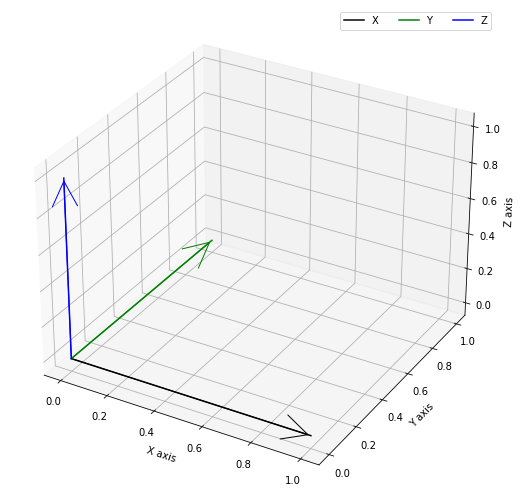

In [6]:
from EngineeringToolbox.Robotics import kinematics
__F__ = kinematics.__F__
a = Line(origin=Point([0.5, 0.5, 0]), 
                      xyz=[1,1,2])
b = Point([0.5, 0.5, 0.5])
inputs = [__F__]
Plotter.show(inputs, colors = [['black', 'green', 'blue'], 'red'], arrow=False, arrowstyle = "->", mutation_scale = 63, legend = True, labels = [['X', 'Y', 'Z'], 'a'])

# show([b], colors=None, legend=True)
# Plotter.show([__X__, __Y__, __Z__], colors='black')

### Rotation matrix

3x3 matrix whose column vectors are orthonormal frame.
It is orthogonal matrix (xTy = 0, xTx = 1, RTR = I, RT = R-1)

##### elementary rotations

Rotation around one of the coordinate axes. Positive if counterclockwise

In [7]:
rot = RotationMatrix(0.2,0.5,1)
print('Rotation around X of {}' .format(0.2), '\n', rot.rot_X, '\n')
print('Rotation around Y of {}' .format(0.5), '\n', rot.rot_Y, '\n')
print('Rotation around Z of {}' .format(0.1), '\n', rot.rot_Z)

Rotation around X of 0.2 
 [[ 1.          0.          0.        ]
 [ 0.          0.54030231 -0.84147098]
 [ 0.          0.84147098  0.54030231]] 

Rotation around Y of 0.5 
 [[ 0.87758256  0.          0.47942554]
 [ 0.          1.          0.        ]
 [-0.47942554  0.          0.87758256]] 

Rotation around Z of 0.1 
 [[ 0.98006658 -0.19866933  0.        ]
 [ 0.19866933  0.98006658  0.        ]
 [ 0.          0.          1.        ]]


### Exercise 1

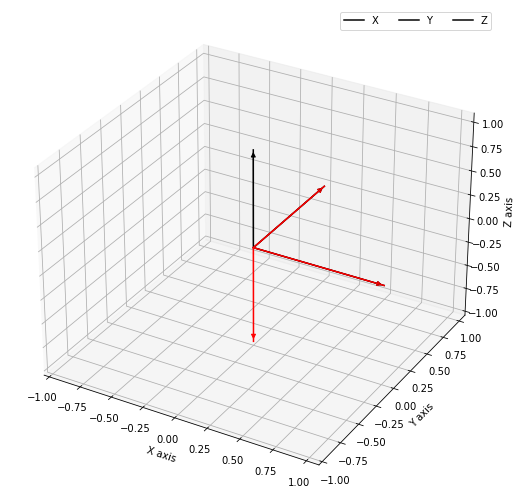

In [8]:
F = Frame([Line([0,1,0]),
          Line([1,0,0]),
          Line([0,0,1])])

rot = RotationMatrix.Y_rot(np.pi/2)

from copy import deepcopy

F_rot = deepcopy(F)
F_rot.apply_rotation(rot)

Plotter.show([F, F_rot],
             labels=[['X', 'Y', 'Z'], ['_x', '_y', '_z']],
             colors=['black', 'red'],
             legend = True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


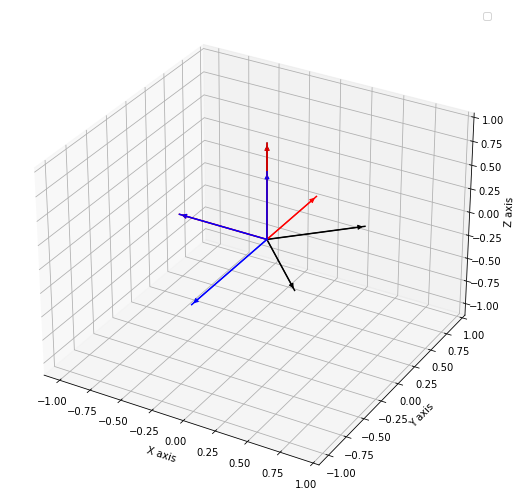

In [9]:
F = Frame([Line([0.5,0.5,0]),
          Line([0.5,-0.5,0]),
          Line([0,0,1])])

rot1 = RotationMatrix.Z_rot(3*np.pi/4)
rot2 = RotationMatrix.X_rot(np.pi/2)

from copy import deepcopy

F_rot = deepcopy(F)
F_rot.apply_rotation(rot1)
# F_rot.apply_rotation(rot2)

F_rot_rot = deepcopy(F)
F_rot_rot.apply_rotation([rot2, rot1])

Plotter.show([F, F_rot, F_rot_rot],
             colors=['black', 'red', 'blue'],
             legend = True)

### develop

In [10]:
rot1

array([[-0.70710678, -0.70710678,  0.        ],
       [ 0.70710678, -0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

# rotation series using fixed frame

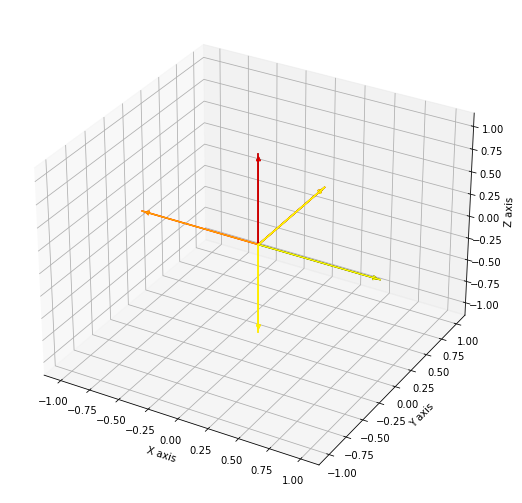

In [11]:
F = Frame([Line([0.5,0.5,0]),
          Line([0.5,-0.5,0]),
          Line([0,0,1])])

F0 = deepcopy(__F__)
F1 = deepcopy(F0)
F2 = deepcopy(F0)
rot1 = RotationMatrix.Z_rot(np.pi/2)
rot2 = RotationMatrix.X_rot(-np.pi/2)
rot3 = RotationMatrix.Y_rot(-np.pi/2)
F0.apply_rotation(rot1)
F1.apply_rotation([rot2, rot1])


F2.apply_rotation(rot1)
F2.apply_rotation(rot2)
F2.apply_rotation(rot3)


Plotter.show([__F__, F0, F1, F2], colors=['black', 'red', 'orange', 'yellow'])

## rotation series using its axes

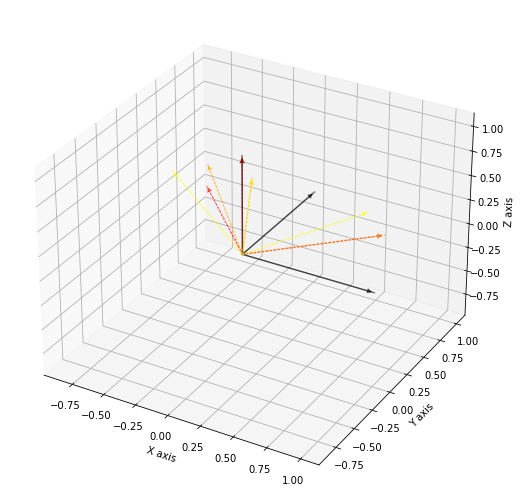

In [12]:
F = Frame([Line([0.5,0.5,0]),
          Line([0.5,-0.5,0]),
          Line([0,0,1])])

F0 = deepcopy(__F__)
F1 = deepcopy(F0)
F2 = deepcopy(F0)
rot1 = RotationMatrix.Z_rot(np.pi/4)
rot2 = RotationMatrix.X_rot(np.pi/12)
rot3 = RotationMatrix.Z_rot(np.pi/12)
F0.apply_rotation(rot1)
F1.apply_rotation([rot1, rot2])


F2.apply_rotation(rot3)
F2.apply_rotation(rot2)
F2.apply_rotation(rot1)


Plotter.show([__F__, F0, F1, F2], colors=['black', 'red', 'orange', 'yellow'],
            alpha=0.5, ls=["-", "dotted", "dotted", 'dotted'])

In [14]:
%matplotlib qt